# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек  
Выполнила студентка группы 9382 Балаева Милана, вариант 67

## Цель работы
Формирование представления об аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения
**Бинарный метод возведения числа в степень**  
Бинарный метод возведения в степень - метод, с помощью , которого любое  число возводится в натуральную степень. Показатель степени представляется в двоичном виде (рассматривается слева направо),  первый слева байт числа игнорируется. Затем рассматривается получившееся число и в зависимости от значения байтов числа( 1 или 0), выполняются следующие операции: 
1) байт степени равен 1 - текущее число возводится в квадрат и умножается на исходное.

2) байт степени равен 0 - текущее число возводится в квадрат.

Количество операций умножения в бинарном методе равно: $\lambda(n) + \nu(n) - 1$, где $\lambda(n) = \lfloor log_2 n \rfloor, \ \nu(n)$ - количество единиц в двоичной записи числа

**Метод множителей возведения числа в в степень**  
Метод множителей возведения числа в степень -  метод , при котором число возводится в натуральную степень  $n$ . Если $n$ - простое  , то число возводится в степень $n-1$ и домножается на исходное . Если $n$ - составное, то представляем его в виде : $n = i * k$ , где $i$ - наименьший простой делитель $n$, $k$ - делитель $n$ . Далее исходное  число возводится сначала в степень  $i$ , а потом получившееся число возводится в степень $k$ . 

**Аддитивной цепочкой** для $n \in N$ называется последовательность натуральных чисел $a_0 = 1, a_1, a_2, \ldots , a_m = n$, где $a_i = a_j + a_k$, $k \le j < i$, $\forall  i = 1..m$. Каждый элемент образован сложением любых двух предыдущих элементов. Количество элементов в цепочке - длина аддитивной цепочки.

**Теорема Брауэра**  
Для некоторого числа $k < log_2 (log_2 n)$ верно: $l(n) < (1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1} - k + 2$.  
Если $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то:
* Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
* Следствие 2: Одна из лучших верхних оценок длины аддитивной цепочки имеет представление: $\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n)) ^ 2})$

**Алгоритм дробления вектора индексов**  
Вектор индексов разбивается на фиксированный и меняющийся. Затем строится звездная цепочка для всего вектора индексов и вычисляется $a_{min}\text{ и }a_{max}$. 
Если:
1. $a_m = n$, то решение найдено;
2. $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему набору фиксированному вектору;
3. $n\in[a_{min}, a_{max}]$, то перебор всех меняющихся векторов.

Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается (длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$).
## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
Применить бинарный метод и метод множителей для $x ^ n$, где $n \ge 30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

Проверить следствие 1 теоремы Брауэра для $n \in 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

Проверить гипотезу Шольца–Брауэра для $1 < n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.


## 1. Бинарный метод и метод множителей  
#### 1.1 Бинарный метод:

In [39]:
def bin_power(number: int, to_power: int) -> tuple:
    bin_pow = bin(int(to_power))[2:]
    count = 0
    curr_pow = 1
    curr_num = number
    list_of_powers = list()
    
    for symbol in bin_pow[1:]:
        
        if symbol == '1':
            curr_num = pow(curr_num, 2) * number
            curr_pow = 2 * curr_pow + 1
            count += 2
            
        elif symbol == '0':
            curr_num *= curr_num
            curr_pow *= 2
            count += 1
        
        list_of_powers.append(curr_pow)
            
    return curr_num, count, list_of_powers

#### 1.2. Метод множителей :

In [40]:
def prime_f(n):
    if n%2 == 0: return 2
    i = 3
    while n%i != 0 and i*i <= n:
        i+= 2
    if i*i <= n: return i
    return n


def multipliers_power(number: int, to_power: int):
    min_mul = prime_f(to_power)
    
    if min_mul == to_power:
        to_power = to_power - 1
        next_min = prime_f(to_power)
        
        result, count_one, list_one = bin_power(number, next_min)
        result, count_two, list_two = bin_power(result, to_power / next_min)
        
        result *= number
    else:
        result, count_one, list_one = bin_power(number, min_mul)
        result, count_two, list_two = bin_power(result, to_power / min_mul)
        
    total_count = count_one + count_two
        
    return result, total_count, list_one, list_two

#### 1.3. Сравнение:
Бинарный метод и метод множителей применяем для возведения числа  $2$ в степени $35$, $41$ и $47$.

Основание: 2
Степень:35
Разбиение степени в бинарном методе: [2, 4, 8, 17, 35]
Разбиение степени в методе множителей: [2, 5]  [3, 7]

Основание: 2
Степень:41
Разбиение степени в бинарном методе: [2, 5, 10, 20, 41]
Разбиение степени в методе множителей: [2]  [2, 5, 10, 20]

Основание: 2
Степень:47
Разбиение степени в бинарном методе: [2, 5, 11, 23, 47]
Разбиение степени в методе множителей: [2]  [2, 5, 11, 23]



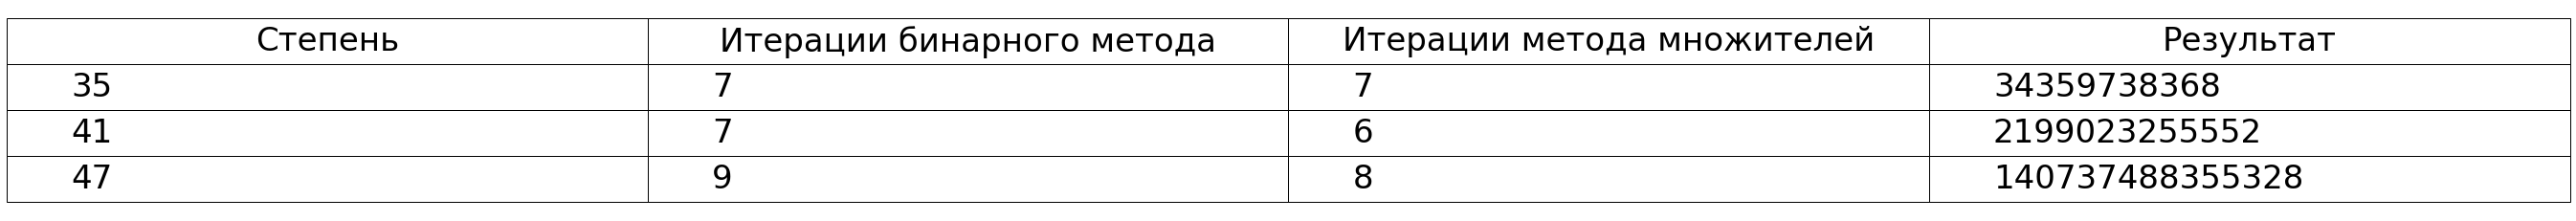

In [23]:
from matplotlib import pyplot as plt


number = 2
res_table = list()
pow_list = (35, 41, 47)




for power in pow_list:
    print(f"Основание: {number}")
    print(f"Степень:{power}")
    
    bin_result, bin_count, bin_list = bin_power(number, power)
    m_result, m_count, m_list_one, m_list_two = multipliers_power(number, power)
    
    print(f"Разбиение степени в бинарном методе: {bin_list}")
    print(f"Разбиение степени в методе множителей: {m_list_one}  {m_list_two}")
    print()

    res_table.append((power, bin_count, m_count, m_result))
    
top = ['Степень', 
       'Итерации бинарного метода', 
       'Итерации метода множителей',
       'Результат']

table = plt.table(res_table, rowLoc='left', cellLoc='left', colLabels=top, loc='center')
table.set_fontsize(35)
table.scale(8, 4) 
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

**Вывод**: В данном случае справедливо сделать вывод, что  методы не особо отличаются, однако у бинарного метода итераций больше, чем у метода множителей.

# 2.Алгоритм Брауэра
#### 2.1 Алгоритм Брауэра:

In [25]:
def brauer(number: int, k: int, chain) -> None:
    d = 2 ** k

    if number < d:
        chain.extend([i for i in range(1, d) if i not in chain])
    else:
        q = number // d
        brauer(q, k, chain)
        chain.extend([i * q for i in range(2, d + 1, 2) if i * q not in chain])

    if number not in chain:
        chain.append(number)

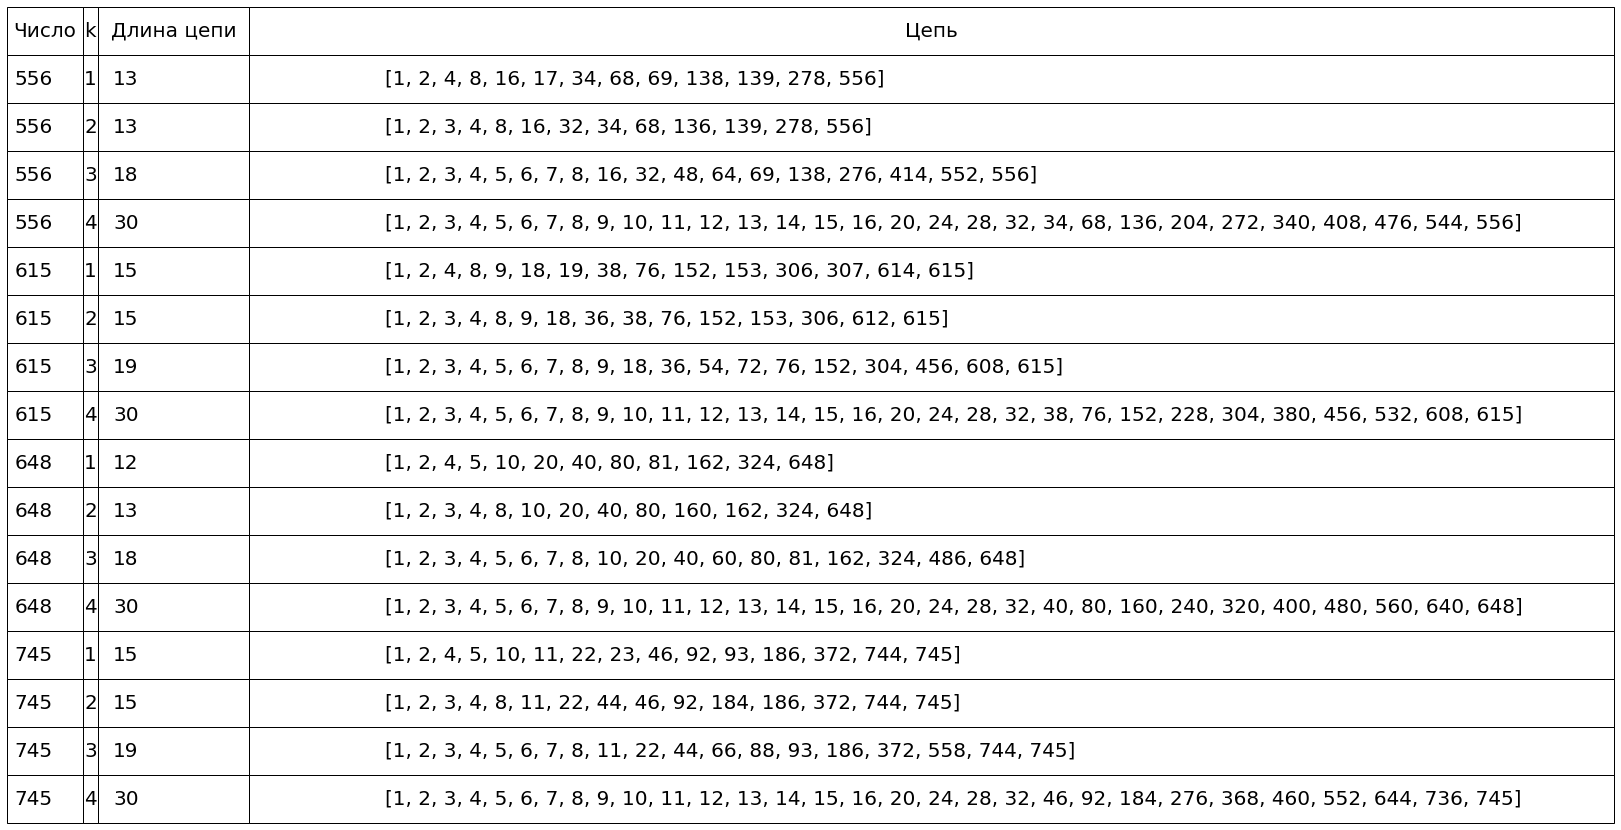

In [26]:
numbers = (556, 615, 648, 745)
range_var = list(range(1, 5))

res_table = list()
for number in numbers:
    for k in range_var:
        chain = list()
        brauer(number, k, chain)
        res_table.append([number, k, len(chain), chain])
    
top = ["Число", "k", "Длина цепи", "Цепь"]

table = plt.table(res_table, rowLoc='right', cellLoc='left', colLabels=top, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод**: Добиться минимальной аддитивной цепочки можно при $k = \lambda(\lambda(n))$,однако, чем больше $k$, тем хуже будет результат.

# 3. Алгоритм дробления вектора индексов  
#### 3.1Алгоритм дробления вектора индексов:

In [32]:
from math import log
from typing import List, Optional
from time import time


def decrement_vector_indexes(vector_indexes: List[int], q: int):
    reversed_vector_indexes = vector_indexes[::-1]
    index_of_higher_value = -1

    for index, value in enumerate(reversed_vector_indexes):
        if value > 1:
            index_of_higher_value = index
            break

    if index_of_higher_value == -1:
        return

    index_of_higher_value = len(vector_indexes) - index_of_higher_value - 1
    vector_indexes[index_of_higher_value] -= 1

    for index in range(index_of_higher_value + 1, len(vector_indexes)):
        vector_indexes[index] = index + q + 1


def get_star_chain(vector_indexes: List[int]):
    chain = [1]
    for index in vector_indexes:
        chain.append(chain[-1] + chain[index - 1])
    return chain


def get_minimal_star_chain(number: int) -> Optional[List[int]]:
    start = int(log(number, 2))
    end = start + bin(number)[2:].count("1")

    for m in range(start, end):
        q = m // 2 or 1
        vector_indexes = [i for i in range(1, q + 1)]
        mutable_vector_length = m - q

        while not all(index == 1 for index in vector_indexes):
            max_mutable_vector = [i + q for i in range(1, mutable_vector_length + 1)]
            min_mutable_vector = [1] * mutable_vector_length

            min_star_chain = get_star_chain(vector_indexes + min_mutable_vector)
            max_star_chain = get_star_chain(vector_indexes + max_mutable_vector)

            last_element_of_min_chain = min_star_chain[-1]
            last_element_of_max_chain = max_star_chain[-1]

            if last_element_of_min_chain == number:
                return min_star_chain

            if last_element_of_max_chain == number:
                return max_star_chain

            if last_element_of_min_chain < number < last_element_of_max_chain:

                while not all(index == 1 for index in max_mutable_vector):
                    decrement_vector_indexes(max_mutable_vector, q)
                    current_star_chain = get_star_chain(vector_indexes + max_mutable_vector)
                    last_element_of_current_chain = current_star_chain[-1]
                    if last_element_of_current_chain == number:
                        return current_star_chain

            decrement_vector_indexes(vector_indexes, 0)

    return get_star_chain(vector_indexes)

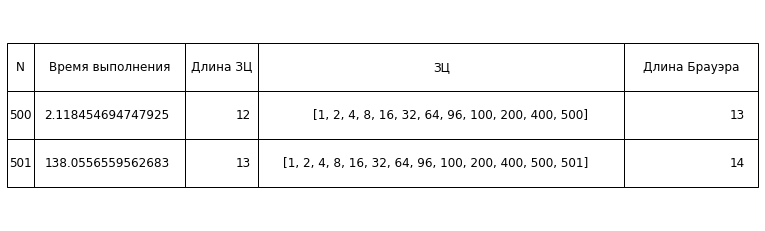

In [33]:
from time import time

numbers = (500, 501)
range_var = list(range(1, 5))

table_res = list()

for number in numbers:
    
    start_of_star_chain = time()
    star_chain = get_minimal_star_chain(number)
    end_of_star_chain = time()
    result_time = end_of_star_chain - start_of_star_chain
    
    brauer_chains = list()
    
    for k in range_var:
        brauer_chain = list()
        brauer(number, k, brauer_chain)
        brauer_chains.append(brauer_chain)
    
    minimal_brauer_chain = min(brauer_chains, key=lambda chain: len(chain))
    table_res.append([number, result_time, len(star_chain), star_chain, len(minimal_brauer_chain)])
    
top = ["N", "Время выполнения", "Длина ЗЦ", "ЗЦ", "Длина Брауэра"]

table = plt.table(table_res, rowLoc='right', colLabels=top, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(12)
table.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод**:Алгоритм дробления вектора индексов всегда выдаёт минимальную по длине аддитивную цепочку, в отличие от алгоритма Брауэра , который выдаёт цепочки большей длины. Алгоритм Брауэра работает быстрее, поэтому эффективнее.

# Проверка следствия теоремы Брауэра 

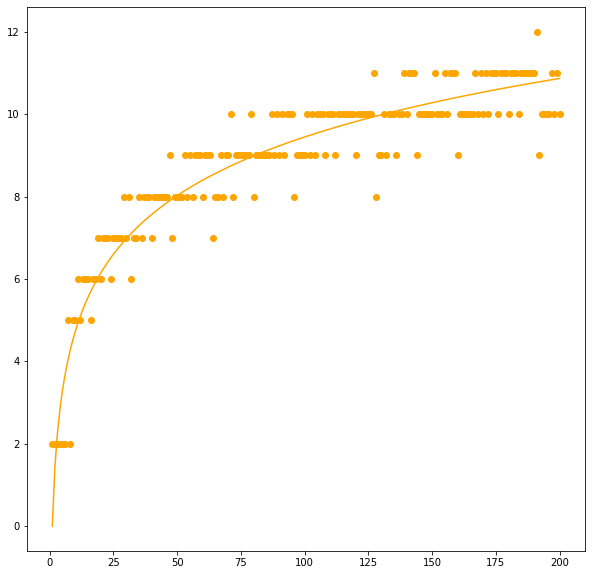

In [38]:
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import numpy


def model(t, cfs):
    return numpy.log(t) * cfs[0]


def residuals(cfs, y, t):
    return y - model(t, cfs)


from_value = 1
to_value = 201

values = [i for i in range(from_value, to_value)]
results = [len(get_minimal_star_chain(value)) for value in values]

_, _ = plt.subplots(figsize=(10, 10))
p, _ = leastsq(residuals, 1, args=(results, values))
plt.plot(values, results, 'o', values, model(values, p), color="orange")
plt.show()

**Вывод**: Как видно из графика, значения длин аддитивных цепочек апроксимируется логарифмической кривой, это подтверждаем следствие теоремы Брауэра

# Общий вывод  
Появилось понимание об аддитивных цепочках, умение составлять и применять алгоритмы для нахождения минимальных таких цепочек для заданного числа, навыки использования систем компьютерной алгебры для реализации алгоритмов. Были составлены алгоритмы для возведения числа в степень: бинарный и метод множителей. Реализованы алгоритмы Брауэра и дробления вектора индексов для нахождения минимальных аддитивных цепочек. Метод Брауэра работал значительно эффективнее, чем алгоритм дробления вектора индексов, но погрешность при его использовании была больше чем у алгоритма дробления ВИ. Было проверено следствие теоремы Брауэра.